## Digit recognizer usando Scikit Learn y Regresión Lineal

Cargar archivos desde Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importar scikit learn

In [0]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

Imprimir el tamaño de nuestro dataset

In [0]:
# imagenes
print(mnist.data.shape)
# etiquetas
print(mnist.target.shape)

Repartir nuestro dataset en train y test

In [0]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

Mostrar los primeras  5 digitos

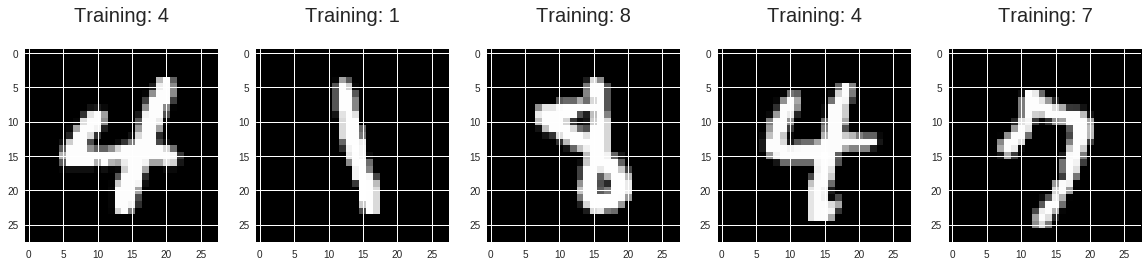

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

Importar el modelo de Regresion logistica

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

Entrenar nuestro modelo

In [0]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Predecir números usando nuestro modelo entrenado

In [0]:
predictions = logisticRegr.predict(test_img)

Medimos la presicion

In [0]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9134


Ploteanod la matriz de confusión

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [0]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 908    0    3    4    2    3    7    1    7    1]
 [   0 1121   10    4    1    4    4    2   14    3]
 [   3    8  877   17   13    3   15   14   30    2]
 [   1    7   32  927    0   25    2    7   25   12]
 [   5    1    5    0  873    2    8    4   10   40]
 [  12    4   10   39   11  778   17    5   33   12]
 [   4    1    5    1    5    9  982    0    5    1]
 [   8    3   16    3   12    1    0  942    5   39]
 [   5   20   11   29    6   30    9    4  849   15]
 [   7    2    4   19   39    5    0   28   11  877]]


NameError: ignored

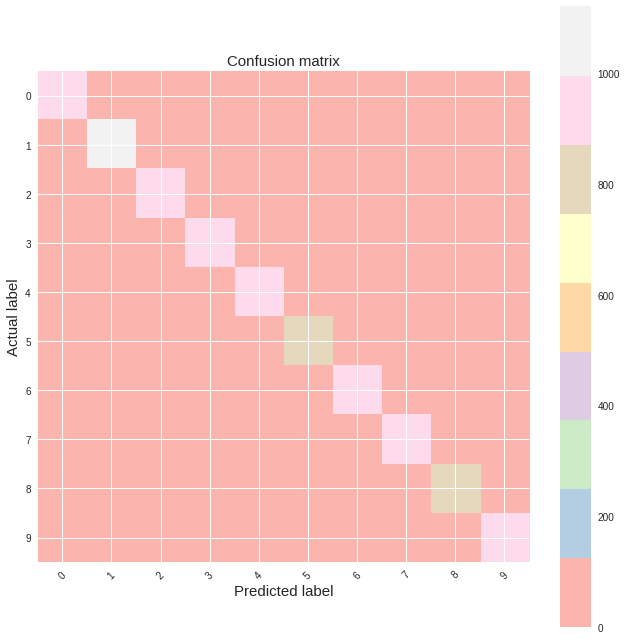

In [0]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in xrange(width):
 for y in xrange(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')